In [1]:
# Example of file for charm stocastics
import uproot
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Delta_Phi(phi1, phi2):
    pi = 3.14159265358979323846
    dphi = abs(phi1 - phi2)
    return np.where(dphi > pi, 2*pi - dphi, dphi)

In [3]:
# Here below we are just reading the csv file
dfcharm = pd.read_csv("input/EventData.csv")

#with the command below you can inspect the columns of the dataframe
dfcharm.columns

Index(['cLO_pT', 'cLO_phi', 'cLO_eta', 'c_pT', 'c_phi', 'c_eta', 'D_pT',
       'D_phi', 'D_eta', 'cbarLO_pT', 'cbarLO_phi', 'cbarLO_eta', 'cbar_pT',
       'cbar_phi', 'cbar_eta', 'Dbar_pT', 'Dbar_phi', 'Dbar_eta', 'Kpl_pT',
       'Kpl_phi', 'Kpl_eta', 'Kmi_pT', 'Kmi_phi', 'Kmi_eta', 'pipl_pT',
       'pipl_phi', 'pipl_eta', 'pimi_pT', 'pimi_phi', 'pimi_eta',
       'multiplicity'],
      dtype='object')

In [4]:
#Build new columns in the dataframe
#momentum ratios of c to cbar at LO, Hadronisation and Confinement
dfcharm["D_ptratio"] = dfcharm["D_pT"]/dfcharm["Dbar_pT"]
dfcharm["c_ptratio"] = dfcharm["c_pT"]/dfcharm["cbar_pT"]
dfcharm["cLO_ptratio"] = dfcharm["cLO_pT"]/dfcharm["cbarLO_pT"]
#fragmentation functions for c and cbar
dfcharm["FFc"] = dfcharm["D_pT"]/dfcharm["cLO_pT"]
dfcharm["FFcbar"] = dfcharm["Dbar_pT"]/dfcharm["cbarLO_pT"]
#pseudorapidity separation of ccbar pair at LO, Hadronisation and Confinement
dfcharm["deta_DD"] = abs( dfcharm["D_eta"] - dfcharm["Dbar_eta"] )
dfcharm["deta_cc"] = abs( dfcharm["c_eta"] - dfcharm["cbar_eta"] )
dfcharm["deta_ccLO"] = abs( dfcharm["cLO_eta"] - dfcharm["cbarLO_eta"] )
#pseudorapidity separation of c-quark and respective D0 meson
dfcharm["deta_cD"] = abs( dfcharm["c_eta"] - dfcharm["D_eta"] )
dfcharm["deta_cDbar"] = abs( dfcharm["cbar_eta"] - dfcharm["Dbar_eta"] )
#angular separation of ccbar pair at LO, Hadronisation and confinement
dfcharm["dphi_DD"] = Delta_Phi(dfcharm["D_phi"], dfcharm["Dbar_phi"]) 
dfcharm["dphi_cc"] = Delta_Phi(dfcharm["c_phi"], dfcharm["cbar_phi"])
dfcharm["dphi_ccLO"] = Delta_Phi(dfcharm["cLO_phi"], dfcharm["cbarLO_phi"])
#angular separation of c-quark and respective D0 meson
dfcharm["dphi_cD"] = Delta_Phi(dfcharm["c_phi"], dfcharm["D_phi"])
dfcharm["dphi_cDbar"] = Delta_Phi(dfcharm["cbar_phi"], dfcharm["Dbar_phi"])

(0, 800)

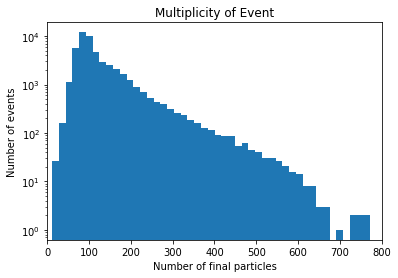

In [5]:
#multiplicity plot
plt.yscale("log")
plt.title("Multiplicity of Event")
plt.xlabel("Number of final particles")
plt.ylabel("Number of events")
plt.hist(dfcharm["multiplicity"], bins=50)
plt.xlim([0,800])

(0.01, 3)

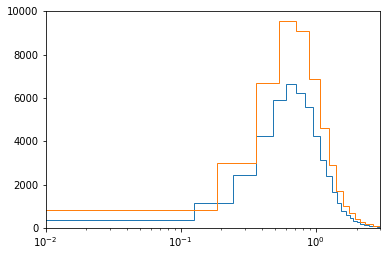

In [6]:
#Fragmentation functions for c and cbar
plt.xscale("log")
plt.hist(dfcharm["FFc"], bins=500, label = "c-quark", histtype = "step", fill = False)
plt.hist(dfcharm["FFcbar"], bins=500, label = '$\overline{c}$-quark', histtype = "step", fill = False)
plt.xlim([0.01,3])

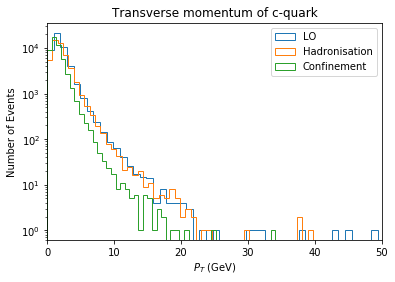

In [7]:
#pT of charm states
plt.yscale("log")
plt.xlim([0,50])
plt.title("Transverse momentum of c-quark")
plt.xlabel(r'$P_T$ (GeV)')
plt.ylabel('Number of Events')
plt.hist(dfcharm["cLO_pT"], bins=50, label = "LO", histtype = "step", fill = False)
plt.hist(dfcharm["c_pT"], bins=50, label = "Hadronisation", histtype = "step", fill = False)
plt.hist(dfcharm["D_pT"], bins=50, label = "Confinement", histtype = "step", fill = False)
plt.legend()

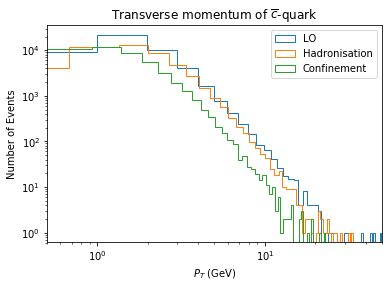

In [8]:
#pT of cbar states
plt.yscale("log")
plt.xscale("log")
plt.xlim([0.5,50])
plt.title(r'Transverse momentum of $\overline{c}$-quark')
plt.xlabel(r'$P_T$ (GeV)')
plt.ylabel('Number of Events')
plt.hist(dfcharm["cbarLO_pT"], bins=50, label = "LO", histtype = "step", fill = False)
plt.hist(dfcharm["cbar_pT"], bins=50, label = "Hadronisation", histtype = "step", fill = False)
plt.hist(dfcharm["Dbar_pT"], bins=50, label = "Confinement", histtype = "step", fill = False)
plt.legend()

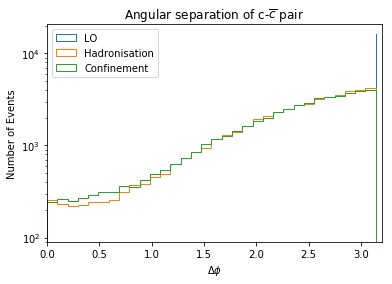

In [9]:
#angular separation of ccbar pair
plt.yscale("log")
plt.xlim([0,3.2])
plt.title(r'Angular separation of c-$\overline{c}$ pair')
plt.xlabel(r'$\Delta\phi$')
plt.ylabel('Number of Events')
plt.hist(dfcharm["dphi_ccLO"], bins=32, label = "LO", histtype = "step", fill = False)
plt.hist(dfcharm["dphi_cc"], bins=32, label = "Hadronisation", histtype = "step", fill = False)
plt.hist(dfcharm["dphi_DD"], bins=32, label = "Confinement", histtype = "step", fill = False)
plt.legend()

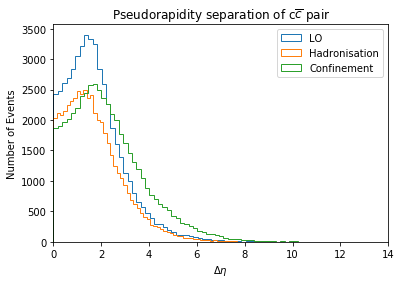

In [10]:
#pseudorapidity separation of ccbar pair
plt.xlim([0,14])
plt.title(r'Pseudorapidity separation of c$\overline{c}$ pair')
plt.xlabel(r'$\Delta\eta$')
plt.ylabel('Number of Events')
plt.hist(dfcharm["deta_ccLO"], bins=70, label = "LO", histtype = "step", fill = False)
plt.hist(dfcharm["deta_cc"], bins=70, label = "Hadronisation", histtype = "step", fill = False)
plt.hist(dfcharm["deta_DD"], bins=70, label = "Confinement", histtype = "step", fill = False)
plt.legend()

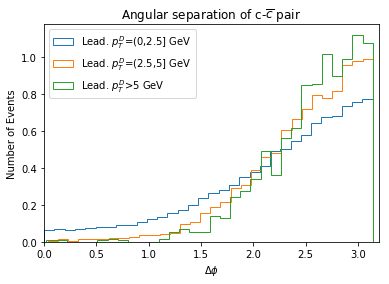

In [11]:
#plot delta phi and delta eta in bins of pt
#Organise in bins of leading D meson pT. Try (0-2.5],(2.5,5],(>5) GeV
dfcharm["LeadingD_pT"] = dfcharm[["D_pT","Dbar_pT"]].max(axis=1)
dfcharm["pT0to2.5"] = np.where( dfcharm["LeadingD_pT"] <= 2.5, True, False)
dfcharm["pT2.5to5"] = np.logical_and( np.greater(dfcharm["LeadingD_pT"], 2.5), np.less_equal(dfcharm["LeadingD_pT"], 5))
dfcharm["pT5plus"] = np.where( dfcharm["LeadingD_pT"] > 5, True, False)

dphi_bin1 = []
dphi_bin2 = []
dphi_bin3 = []
deta_bin1 = []
deta_bin2 = []
deta_bin3 = []
#loop over column and create lists of data that passes bin selection
for i in range(len(dfcharm["dphi_DD"])):
    if dfcharm.loc[i,"pT0to2.5"] : 
        dphi_bin1.append(dfcharm.loc[i,"dphi_DD"])
        deta_bin1.append(dfcharm.loc[i,"deta_DD"])
    elif dfcharm.loc[i,"pT2.5to5"] : 
        dphi_bin2.append(dfcharm.loc[i,"dphi_DD"])
        deta_bin2.append(dfcharm.loc[i,"deta_DD"])
    elif dfcharm.loc[i,"pT5plus"] : 
        dphi_bin3.append(dfcharm.loc[i,"dphi_DD"])
        deta_bin3.append(dfcharm.loc[i,"deta_DD"])

#plot histograms
plt.xlim([0,3.2])
plt.title(r'Angular separation of c-$\overline{c}$ pair')
plt.xlabel(r'$\Delta\phi$')
plt.ylabel('Number of Events')
plt.hist(dphi_bin1, bins=32, label='Lead. $p_{T}^{D}$=(0,2.5] GeV', histtype="step", fill = False, density = True)
plt.hist(dphi_bin2, bins=32, label='Lead. $p_{T}^{D}$=(2.5,5] GeV', histtype="step", fill = False, density = True)
plt.hist(dphi_bin3, bins=32, label='Lead. $p_{T}^{D}$>5 GeV', histtype="step", fill = False, density = True)
plt.legend(loc="upper left")

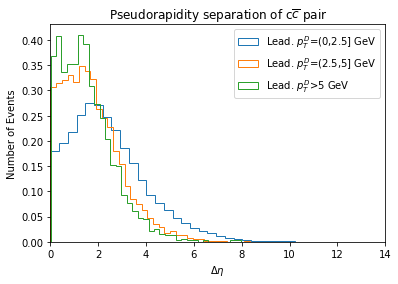

In [12]:
plt.xlim([0,14])
plt.title(r'Pseudorapidity separation of c$\overline{c}$ pair')
plt.xlabel(r'$\Delta\eta$')
plt.ylabel('Number of Events')
plt.hist(deta_bin1, bins=35, label='Lead. $p_{T}^{D}$=(0,2.5] GeV', histtype="step", fill = False, density = True)
plt.hist(deta_bin2, bins=35, label='Lead. $p_{T}^{D}$=(2.5,5] GeV', histtype="step", fill = False, density = True)
plt.hist(deta_bin3, bins=35, label='Lead. $p_{T}^{D}$>5 GeV', histtype="step", fill = False, density = True)
plt.legend()

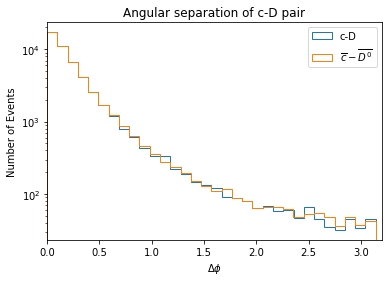

In [13]:
#angular separation of c-D
plt.yscale("log")
plt.xlim([0,3.2])
plt.title(r'Angular separation of c-D pair')
plt.xlabel(r'$\Delta\phi$')
plt.ylabel('Number of Events')
plt.hist(dfcharm["dphi_cD"], bins=32, label = "c-D", histtype = "step", fill = False)
plt.hist(dfcharm["dphi_cDbar"], bins=32, label = '$\overline{c}-\overline{D^0}$', histtype = "step", fill = False)
plt.legend()

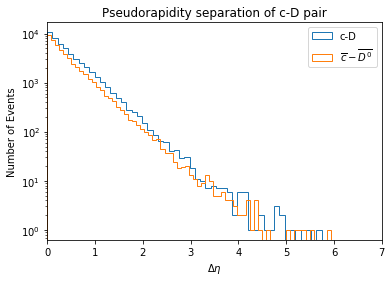

In [14]:
#pseudorapidity separation of c-D
plt.yscale("log")
plt.xlim([0,7])
plt.title(r'Pseudorapidity separation of c-D pair')
plt.xlabel(r'$\Delta\eta$')
plt.ylabel('Number of Events')
plt.hist(dfcharm["deta_cD"], bins=70, label = "c-D", histtype = "step", fill = False)
plt.hist(dfcharm["deta_cDbar"], bins=70, label = '$\overline{c}-\overline{D^0}$', histtype = "step", fill = False)
plt.legend()

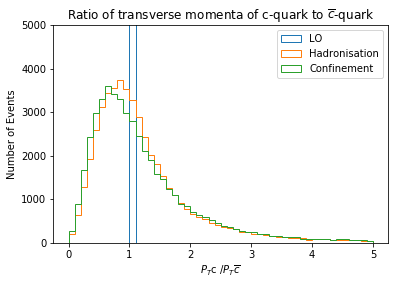

In [15]:
#pt ratio c to cbar

plt.title(r'Ratio of transverse momenta of c-quark to $\overline{c}$-quark')
plt.xlabel(r'$P_T$c /$P_T\overline{c}$')
plt.ylabel('Number of Events')
plt.ylim([0,5000])
plt.hist(dfcharm["cLO_ptratio"], bins=50, range = [0,5], label = "LO", histtype = "step", fill = False)
plt.hist(dfcharm["c_ptratio"], bins=50, range = [0,5], label = "Hadronisation", histtype = "step", fill = False)
plt.hist(dfcharm["D_ptratio"], bins=50, range = [0,5], label = "Confinement", histtype = "step", fill = False)
plt.legend()

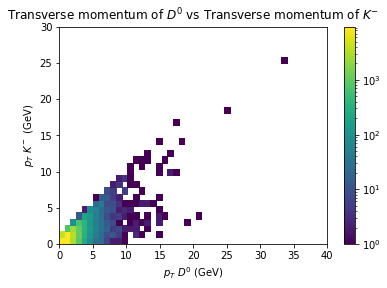

In [16]:
#pT D0 vs pt K-
plt.title('Transverse momentum of $D^{0}$ vs Transverse momentum of $K^{-}$')
plt.xlabel(r'$p_T$ $D^0$ (GeV)')
plt.ylabel(r'$p_T$ $K^-$ (GeV)')
plt.hist2d(dfcharm["D_pT"],dfcharm["Kmi_pT"], bins=[40,30], norm=mpl.colors.LogNorm())
plt.xlim([0,40])
plt.ylim([0,30])
plt.colorbar()

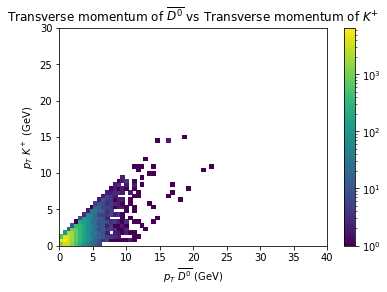

In [17]:
#pT D0bar vs pt K+
plt.title('Transverse momentum of $\overline{D^{0}}$ vs Transverse momentum of $K^{+}$')
plt.xlabel(r'$p_T$ $\overline{D^0}$ (GeV)')
plt.ylabel(r'$p_T$ $K^+$ (GeV)')
plt.hist2d(dfcharm["Dbar_pT"],dfcharm["Kpl_pT"], bins=[40,30], norm=mpl.colors.LogNorm())
plt.xlim([0,40])
plt.ylim([0,30])
plt.colorbar()

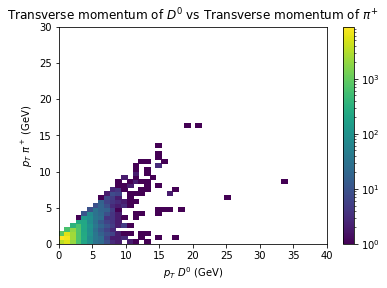

In [18]:
#pT D0 vs pt pi+
plt.title('Transverse momentum of $D^{0}$ vs Transverse momentum of $\pi^{+}$')
plt.xlabel(r'$p_T$ $D^0$ (GeV)')
plt.ylabel(r'$p_T$ $\pi^+$ (GeV)')
plt.hist2d(dfcharm["D_pT"],dfcharm["pipl_pT"], bins=[40,30], norm=mpl.colors.LogNorm())
plt.xlim([0,40])
plt.ylim([0,30])
plt.colorbar()

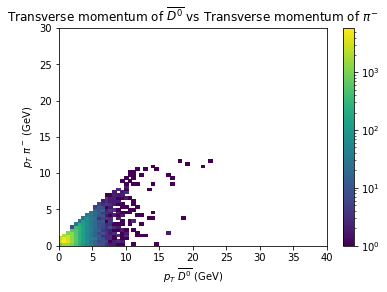

In [19]:
#pT D0bar vs pt pi-
plt.title('Transverse momentum of $\overline{D^{0}}$ vs Transverse momentum of $\pi^{-}$')
plt.xlabel(r'$p_T$ $\overline{D^0}$ (GeV)')
plt.ylabel(r'$p_T$ $\pi^-$ (GeV)')
plt.hist2d(dfcharm["Dbar_pT"],dfcharm["pimi_pT"], bins=[40,30], norm=mpl.colors.LogNorm())
plt.xlim([0,40])
plt.ylim([0,30])
plt.colorbar()